# Project: Investigate the TMDb_Database - The Movie Database
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This Project will analyse the Movie Database (TMDB_Database).

This is a collaborative database that can be used by everyone in a collaborative way for free.This is a non commercial database that can be used for for example in open source software like kodi.It is a database with detailed informations on movies and can be used to analyse the data of movies.

---
<br>
<br>

## In this analysis I want to get an overview about movies itself.
 
> Question 1 - How good is the quality and strukture of data?<br>
> Question 2 - What are the best rated movies?<br>
> Question 3 - What are the the moste profitables movies<br>
> Question 4 - What are the most popular gendres<br>
> Question 5 - Which movies are the most expensive<br>
> Question 6 - What are the most popular movies<br>
> Question 7 - What are the key indicators for a succesfull movie?<br>
---
<br>


## Which Tuturials are used
*  example:<br> https://making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d
*  magic commands:<br> https://www.aboutdatablog.com/post/top-8-magic-commands-in-jupyter-notebook

<br>
<br>
<br>



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

#### Import packages
which packages are need to analyse the data



In [ ]:
# this is to prevent the output from future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pandas.testing import assert_frame_equal

# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline

### Load data

In [ ]:
# Depreciated: pre 2.0.0 version
movies = pd.read_csv("tmdb-movies.csv") # read movie data von csv file



FileNotFoundError: ignored

### Explore data

#### How many rows and how many columns to we have?

In [ ]:
# See the number of rows and columns
print("Rows, columns: " + str(movies.shape))

Rows, columns: (10866, 21)


#### Show the datasets


In [ ]:
#print the first rows of the dataset
movies.head()

NameError: ignored

In [ ]:
# print the last rows of the dataset
movies.tail()

#### Get general informations

In [ ]:
# get a summery of the dataset
movies.info()  

In [ ]:
#print the key indicators of the dataset
movies.describe()

#### Check for NULL values


In [ ]:
# check and sum the row in each column that has null values
movies.isna().sum()

#### Check for duplicates

In [ ]:
# movies.duplicates()
print('dublicates datasets:')
print(movies.original_title.duplicated) # detect dublicates datasets
movies.duplicated().sum()

print('duplicate titles:' + str(movies.original_title.duplicated))
sum(movies.duplicated())


dublicates datasets:
<bound method Series.duplicated of 0                      Jurassic World
1                  Mad Max: Fury Road
2                           Insurgent
3        Star Wars: The Force Awakens
4                           Furious 7
                     ...             
10861              The Endless Summer
10862                      Grand Prix
10863             Beregis Avtomobilya
10864          What's Up, Tiger Lily?
10865        Manos: The Hands of Fate
Name: original_title, Length: 10866, dtype: object>
duplicate titles:<bound method Series.duplicated of 0                      Jurassic World
1                  Mad Max: Fury Road
2                           Insurgent
3        Star Wars: The Force Awakens
4                           Furious 7
                     ...             
10861              The Endless Summer
10862                      Grand Prix
10863             Beregis Avtomobilya
10864          What's Up, Tiger Lily?
10865        Manos: The Hands of Fate
Name

### Data Cleaning


#### Fill the null values

In [ ]:
# fill the null values
movies.fillna(0)

NameError: ignored

In [ ]:
print('dublicates titles:')
movies.original_title.duplicated() # detect dublicate titles
movies.original_title.duplicated().sum()


dublicates titles:


NameError: ignored

In [ ]:
# check for duplicates titles

In [ ]:
# Extract duplicate rows
movies.loc[movies.duplicated(), :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [ ]:
# Removing the duplicates

In [ ]:
print("BEFORE: Rows,Columns) : ",movies.shape)
# remove dublicates
movies.drop_duplicates(inplace = True)

# check 
print("AFTER: Rows,Columns) : ",movies.shape)

NameError: ignored

In [ ]:
temp_movies = movies.drop_duplicates()
temp_movies.shape

(10865, 21)

In [ ]:
# Extract duplicate rows
movies.loc[movies.duplicated(), :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [ ]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Drop the unnesesarry fields.

In [ ]:
movies.drop(['imdb_id','cast','homepage','director','tagline','keywords','overview'], axis=1, inplace=True)

#### *Renaming* some fields 

In [ ]:
movies.rename(columns={
        'runtime': 'runtime in minutes', 
        'Revenue (millions)': 'revenue'
    }, inplace=True)

#### Remove Duplicate Rows


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   runtime in minutes    10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


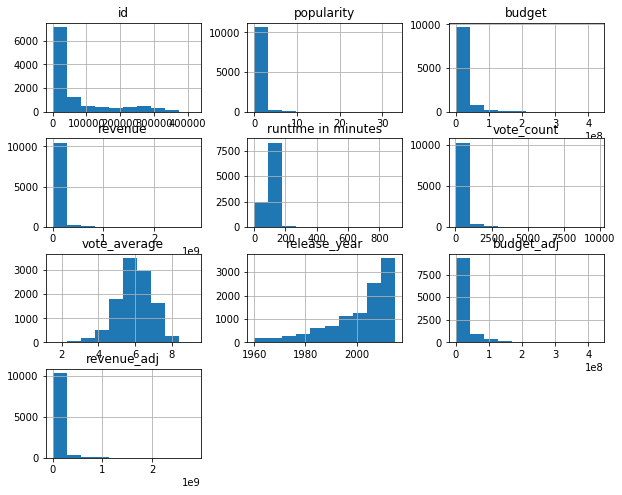

In [ ]:
movies.hist(figsize=(10,8));

some values have missing values:
the following field have 'NULL' values.

overview                
genres  
production_companies

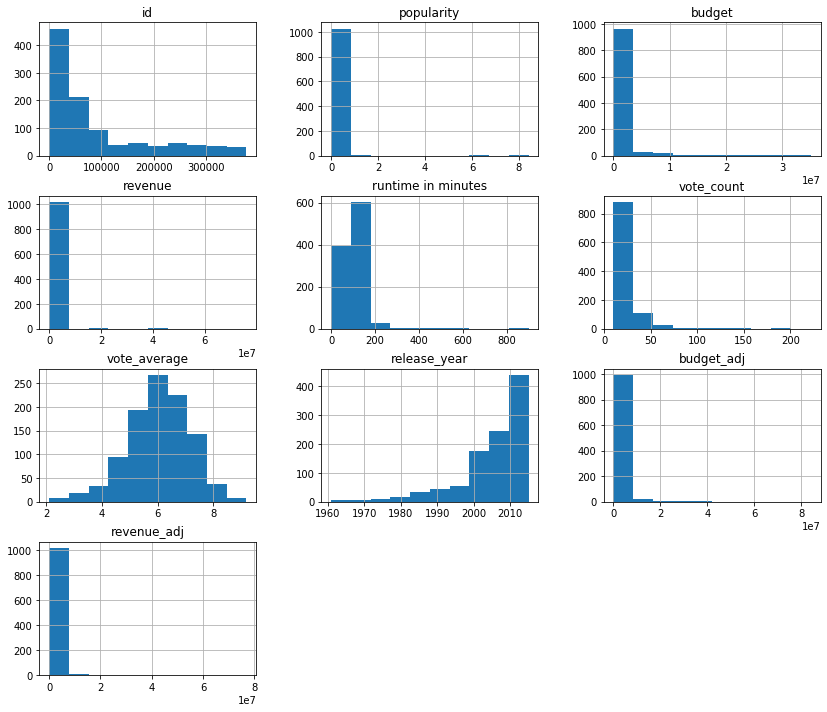

In [ ]:
movies[movies.production_companies.isnull()].hist(figsize=(14,12));

In [ ]:
movies.dropna(inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9827 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9827 non-null   int64  
 1   popularity            9827 non-null   float64
 2   budget                9827 non-null   int64  
 3   revenue               9827 non-null   int64  
 4   original_title        9827 non-null   object 
 5   runtime in minutes    9827 non-null   int64  
 6   genres                9827 non-null   object 
 7   production_companies  9827 non-null   object 
 8   release_date          9827 non-null   object 
 9   vote_count            9827 non-null   int64  
 10  vote_average          9827 non-null   float64
 11  release_year          9827 non-null   int64  
 12  budget_adj            9827 non-null   float64
 13  revenue_adj           9827 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.1+ MB


Wie teuer ist ein Film?

In [ ]:
movies.budget.mean()

16094611.910857841

In [ ]:
movies.budget_adj.mean()         

19313177.478397932

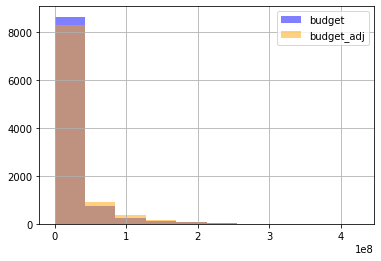

In [ ]:
movies.budget.hist(label='budget', alpha=0.5, color='blue')
movies.budget_adj.hist(label='budget_adj', alpha=0.5, color='orange')
plt.legend();

In [ ]:
movies.genres.value_counts()

Drama                                  639
Comedy                                 617
Drama|Romance                          272
Comedy|Drama                           255
Comedy|Romance                         249
                                      ... 
Adventure|Animation|Fantasy              1
History                                  1
Action|Comedy|Documentary                1
War|Action|Thriller|Science Fiction      1
Comedy|Crime|Thriller|Romance            1
Name: genres, Length: 1926, dtype: int64

In [ ]:
# importing the necessary packages
import pandas as pd


# movies = pd.read_json("tmdb-movies.csv")
movies_csv = pd.read_csv("tmdb-movies.csv") # read movie data

movies = movies_csv.copy()

# movies_clean = movies_clean.rename(columns={'oldName1': 'newName1',
                                    'oldName2': 'newName2'})

movies
movies.info()
movies.head() # show the table of data

# movies.shape(15,10)

# movies.describe()
movies.dtypes
movies.head() # show the table of data

IndentationError: unexpected indent (<ipython-input-30-1ee0bb2293f9>, line 11)

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# importing the necessary packages
import pandas as pd


# Daten auslesen
movies = pd.read_csv("tmdb-movies.csv") # read movie data
movies.info() # get information about the data
movies.head() # show the table of data
movies.isna().sum() # detect and sum empty values  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

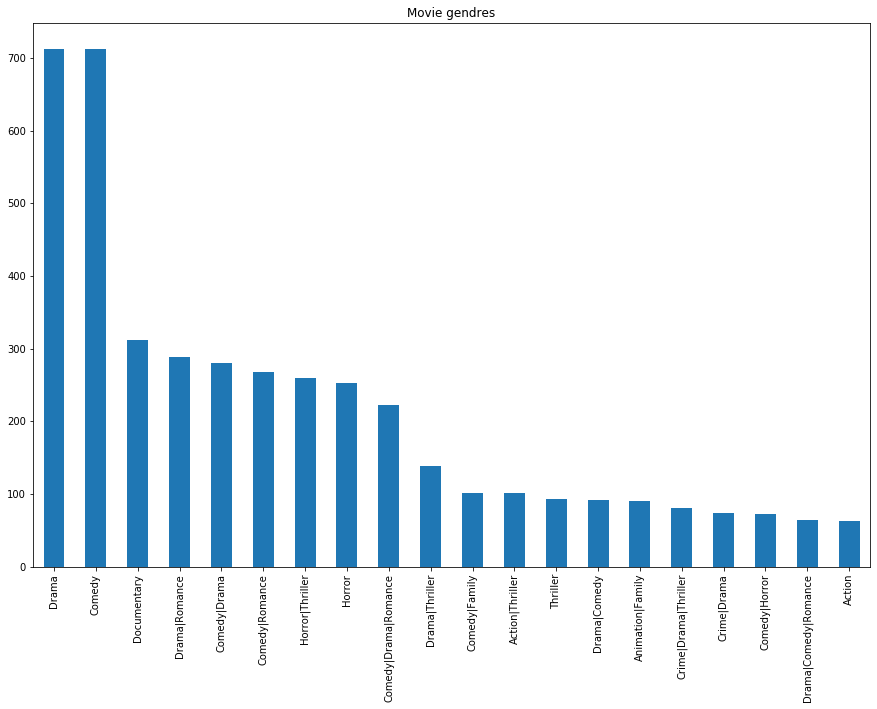

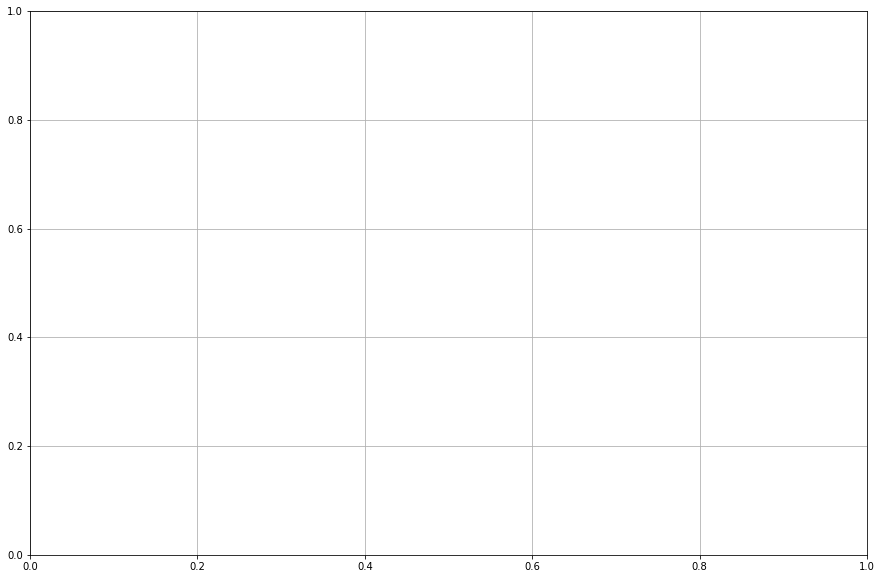

In [ ]:
genres = movies.genres.value_counts().head(20)

# magic command
%matplotlib inline 



genres.plot.bar(
    figsize=[15,10],
    title="Movie gendres",
    label="")

# gendres.legend(loc=2)
# gendres.grid(True)


# Bar Chart
plt.figure(figsize=(15,10))
plt.grid(True)

# plt.plot(movies['genres'],temp_global['mov_avg'], label='Count of G3endr')


# plt.legend(loc=2)
# plt.xlabel('Gendre')




In [ ]:
# Import der Biblitheken
import pandas as pd

# Daten auslesen
movies = pd.read_csv("tmdb-movies.csv") # read movie data

top10 = movies.popularity.value_counts().head(10)

# magic command
%matplotlib inline 
top10.plot.pie()

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 -  How good is the quality and strukture of data?


> **Tip**:
Following is the list of questions which can lead us in the desired direction:-
Most successful genres — bar plot explaining the frequency of movies in each genre.
Frequent Cast in movies — plot showing the spectrum of movies for each actor.
Average budget of the profitable movies — what is the average budget allocated
Average duration of the most profitable movies.
Language of the most profitable movies.
Answers to all the questions above would help us build our hypothesis which is “What is the recipe to make a blockbuster, profitable movie?”

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.



<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 2 -  What are the best rated movies?


> **Tip**:
Following is the list of questions which can lead us in the desired direction:-
Most successful genres — bar plot explaining the frequency of movies in each genre.
Frequent Cast in movies — plot showing the spectrum of movies for each actor.
Average budget of the profitable movies — what is the average budget allocated
Average duration of the most profitable movies.
Language of the most profitable movies.
Answers to all the questions above would help us build our hypothesis which is “What is the recipe to make a blockbuster, profitable movie?”

### Research Question 1 - How good is the quality and strukture of data?


### Research Question 2 - What are the best rated movies?

### Research Question 3 -  What are the the moste profitables movies?

### Research Question 4 - What are the most popular gendres

### Research Question 5 - Which movies are the most expensive


### Research Question 6 - What are the most popular movies

### Research Question 7  - What are the key indicators for a succesfull movie?

# Neuer Abschnitt

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.



In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [ ]:
# count the number of movies per gendres 
countGenres=movies.groupby('genres').count()['id']
print(countGenres.tail())

genres
Western|Drama|Crime|Romance    1
Western|History                1
Western|History|War            1
Western|Horror|Thriller        1
Western|Thriller               1
Name: id, dtype: int64


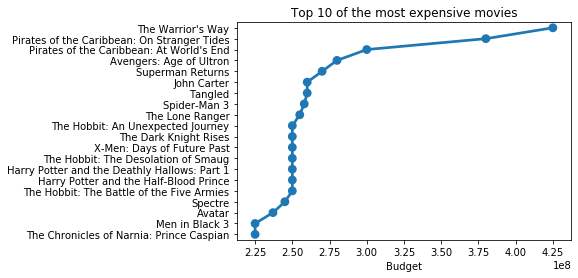

In [ ]:
# movies['original_title'][high_index])

#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
moviesBudget = pd.DataFrame(movies['budget'].sort_values(ascending = False))
moviesBudget['original_title'] = movies['original_title']
data = list(map(str,(moviesBudget['original_title'])))

# extract the top 10 movies with the higest popularity
x = list(data[:20])
y = list(moviesBudget['budget'][:20])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 of the most expensive movies")
ax.set_xlabel("Budget")
sns.set_style("darkgrid")




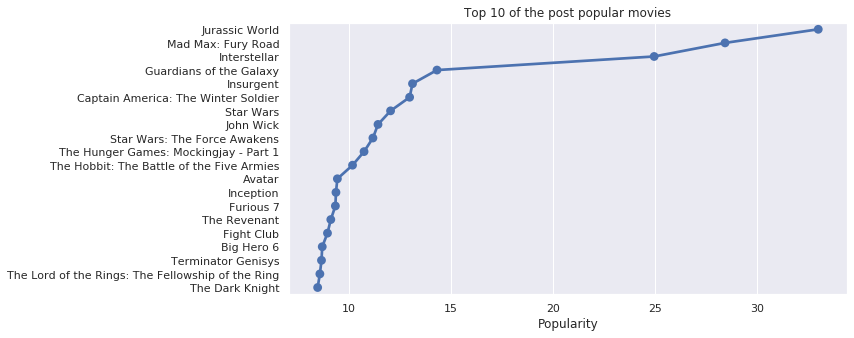

In [ ]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
moviesPopularity = pd.DataFrame(movies['popularity'].sort_values(ascending = False))
moviesPopularity['original_title'] = movies['original_title']
data = list(map(str,(moviesPopularity['original_title'])))

# extract the top 10 movies with the higest popularity
x = list(data[:20])
y = list(moviesPopularity['popularity'][:20])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 of the post popular movies")
ax.set_xlabel("Popularity")
sns.set_style("darkgrid")

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!